In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('marketing_campaign.csv', sep='\t')

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [5]:
data.dropna(inplace=True)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

In [7]:
#handle with outlier
from scipy import stats

data = data[(np.abs(stats.zscore(data["Income"])) < 3)]


In [8]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

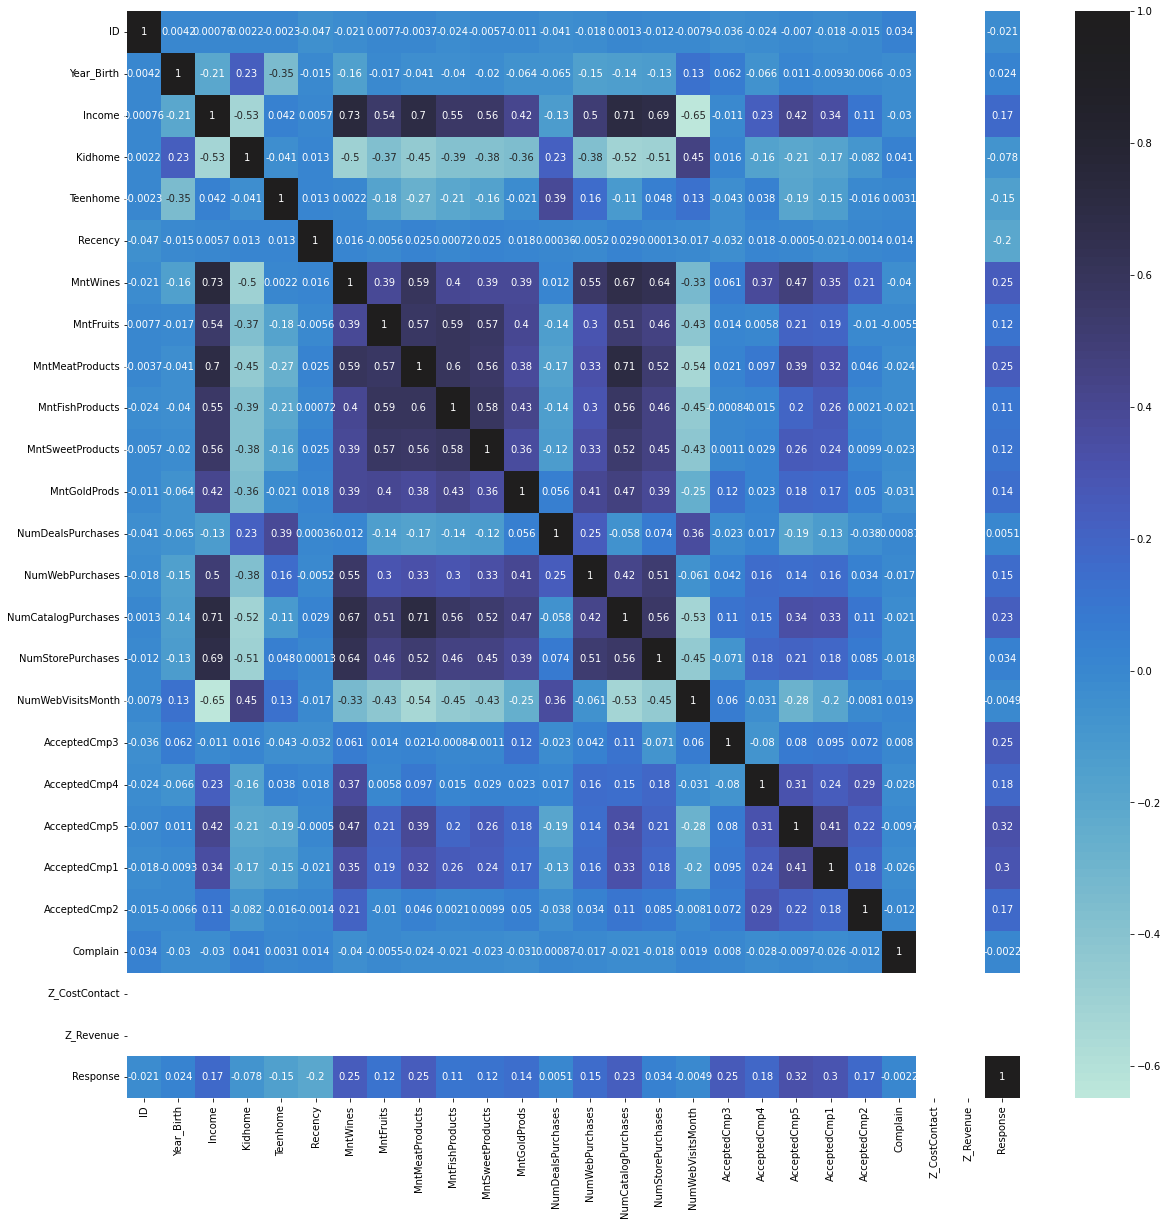

In [10]:
corr = data.corr()
plt.figure(figsize=(20,20))  
sns.heatmap(corr, annot=True, center=True)

In [11]:
data['spent'] = data["MntWines"]+ data["MntFruits"]+ data["MntMeatProducts"]+ data["MntFishProducts"]+ data["MntSweetProducts"]
+ data["MntGoldProds"]

data['age'] = 2021 - data['Year_Birth']

data['saving'] = data['Income'] - data['spent']

data['familySize'] = data['Kidhome'] + data['Teenhome']

data["Living_With"]=data["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone"
                                                    , "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

In [12]:
data.head(5)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,spent,age,saving,familySize,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1529,64,56609.0,0,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,21,67,46323.0,2,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,734,56,70879.0,0,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,48,37,26598.0,1,Partner
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,407,40,57886.0,1,Partner


In [13]:
data.drop(['ID', 'Year_Birth'], axis=1)

,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,spent,age,saving,familySize,Living_With
0,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,...,0,0,3,11,1,1529,64,56609.0,0,Alone
1,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,...,0,0,3,11,0,21,67,46323.0,2,Alone
2,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,...,0,0,3,11,0,734,56,70879.0,0,Partner
3,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,...,0,0,3,11,0,48,37,26598.0,1,Partner
4,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,...,0,0,3,11,0,407,40,57886.0,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,...,0,0,3,11,0,1094,54,60129.0,1,Partner
2236,PhD,Together,64014.0,2,1,10-06-2014,56,406,0,30,...,0,0,3,11,0,436,75,63578.0,3,Partner
2237,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,...,0,0,3,11,0,1217,40,55764.0,0,Alone
2238,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,...,0,0,3,11,0,782,65,68463.0,1,Partner


In [14]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,spent,age,saving,familySize,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1529,64,56609.0,0,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,21,67,46323.0,2,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,734,56,70879.0,0,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,48,37,26598.0,1,Partner
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,407,40,57886.0,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,1094,54,60129.0,1,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,436,75,63578.0,3,Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,1217,40,55764.0,0,Alone
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,782,65,68463.0,1,Partner


In [15]:
df = data.copy()

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2208 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2208 non-null   int64  
 1   Year_Birth           2208 non-null   int64  
 2   Education            2208 non-null   object 
 3   Marital_Status       2208 non-null   object 
 4   Income               2208 non-null   float64
 5   Kidhome              2208 non-null   int64  
 6   Teenhome             2208 non-null   int64  
 7   Dt_Customer          2208 non-null   object 
 8   Recency              2208 non-null   int64  
 9   MntWines             2208 non-null   int64  
 10  MntFruits            2208 non-null   int64  
 11  MntMeatProducts      2208 non-null   int64  
 12  MntFishProducts      2208 non-null   int64  
 13  MntSweetProducts     2208 non-null   int64  
 14  MntGoldProds         2208 non-null   int64  
 15  NumDealsPurchases    2208 non-null   i

In [17]:
#done cleaning data now let's visualize the data

In [18]:
yes_customer = data[data.iloc[:, 28] == 1]
no_customer = data[data.iloc[:, 28] == 0]

In [19]:
yes_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   333 non-null    int64  
 1   Year_Birth           333 non-null    int64  
 2   Education            333 non-null    object 
 3   Marital_Status       333 non-null    object 
 4   Income               333 non-null    float64
 5   Kidhome              333 non-null    int64  
 6   Teenhome             333 non-null    int64  
 7   Dt_Customer          333 non-null    object 
 8   Recency              333 non-null    int64  
 9   MntWines             333 non-null    int64  
 10  MntFruits            333 non-null    int64  
 11  MntMeatProducts      333 non-null    int64  
 12  MntFishProducts      333 non-null    int64  
 13  MntSweetProducts     333 non-null    int64  
 14  MntGoldProds         333 non-null    int64  
 15  NumDealsPurchases    333 non-null    in

In [20]:
no_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1875 entries, 1 to 2238
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   1875 non-null   int64  
 1   Year_Birth           1875 non-null   int64  
 2   Education            1875 non-null   object 
 3   Marital_Status       1875 non-null   object 
 4   Income               1875 non-null   float64
 5   Kidhome              1875 non-null   int64  
 6   Teenhome             1875 non-null   int64  
 7   Dt_Customer          1875 non-null   object 
 8   Recency              1875 non-null   int64  
 9   MntWines             1875 non-null   int64  
 10  MntFruits            1875 non-null   int64  
 11  MntMeatProducts      1875 non-null   int64  
 12  MntFishProducts      1875 non-null   int64  
 13  MntSweetProducts     1875 non-null   int64  
 14  MntGoldProds         1875 non-null   int64  
 15  NumDealsPurchases    1875 non-null   i

<Figure size 1440x1440 with 0 Axes>

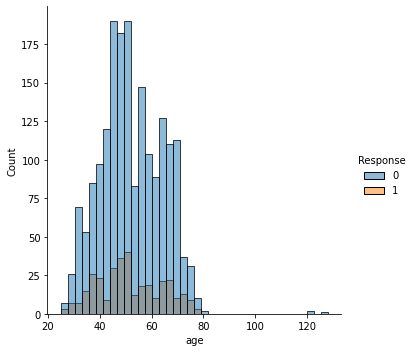

In [21]:
plt.figure(figsize=(20,20))  
sns.displot(data, x='age', hue='Response')

In [22]:
copied_data = data.copy()

In [23]:
copied_data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,spent,age,saving,familySize,Living_With
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,0,0,3,11,1,1529,64,56609.0,0,Alone
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,0,0,3,11,0,21,67,46323.0,2,Alone
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,0,0,3,11,0,734,56,70879.0,0,Partner
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,0,0,3,11,0,48,37,26598.0,1,Partner
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,0,0,3,11,0,407,40,57886.0,1,Partner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,0,0,3,11,0,1094,54,60129.0,1,Partner
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,0,0,3,11,0,436,75,63578.0,3,Partner
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,0,0,3,11,0,1217,40,55764.0,0,Alone
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,0,0,3,11,0,782,65,68463.0,1,Partner


In [24]:
s = (data.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Marital_Status', 'Dt_Customer', 'Living_With']


In [25]:
#Label Encoding the object dtypes.
#so that ML can learn from these object dtypes
from sklearn import preprocessing
LE = preprocessing.LabelEncoder()
for i in object_cols:
    data[i]=data[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [46]:
#Creating a copy of data
#so that it's easier and faster for ML to train
ds = data.copy()
# creating a subset of dataframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response','ID', 
            'Year_Birth','Z_CostContact', 'Z_Revenue', 'Recency', 'NumDealsPurchases',
            'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases','NumWebVisitsMonth', 'saving', 'Kidhome', 'Teenhome'
            , 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'Marital_Status']
ds = ds.drop(cols_del, axis=1)
#Scaling
scaler = preprocessing.StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [47]:
scaled_ds.columns

Index(['Education', 'Income', 'Dt_Customer', 'spent', 'age', 'familySize',
       'Living_With', 'cluster'],
      dtype='object')

In [48]:
scaled_ds

,Education,Income,Dt_Customer,spent,age,familySize,Living_With,cluster
0,-0.348237,0.314089,-1.312001,1.677242,0.984809,-1.266476,-1.346380,-0.425063
1,-0.348237,-0.255431,-0.905501,-0.940425,1.235034,1.404373,-1.346380,-1.351558
2,-0.348237,0.964782,0.609631,0.297239,0.317541,-1.266476,0.742732,-0.425063
3,-0.348237,-1.206626,-0.683775,-0.893557,-1.267219,0.068949,0.742732,1.427927
4,1.431640,0.321573,0.324554,-0.270385,-1.016993,0.068949,0.742732,0.501432
...,...,...,...,...,...,...,...,...
2203,-0.348237,0.463060,-0.298392,0.922146,0.150724,0.068949,0.742732,-0.425063
2204,1.431640,0.597834,-0.641541,-0.220045,1.902301,2.739797,0.742732,0.501432
2205,-0.348237,0.258218,1.016131,1.135656,-1.016993,-1.266476,-1.346380,-0.425063
2206,0.541702,0.850434,0.905267,0.380560,1.068217,0.068949,0.742732,0.501432


In [49]:
# Standardization
from sklearn.preprocessing import StandardScaler
for i in scaled_ds.select_dtypes(exclude='object').columns:
    scaled_ds.loc[:, i] = StandardScaler().fit_transform(np.array(scaled_ds[[i]]))

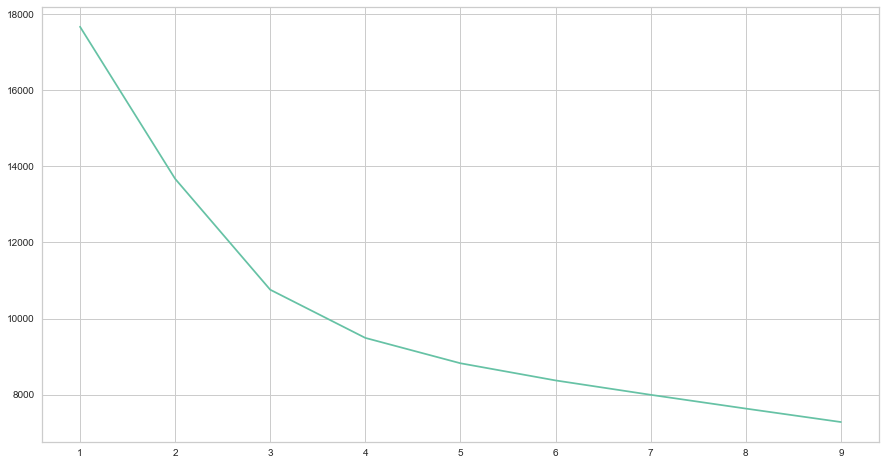

In [50]:
from sklearn.cluster import KMeans
plt.figure(figsize=(15,8))
xx = list(range(1, 10))
sum_of_square = []
for i in xx:
    model = KMeans(n_clusters=i, random_state=1).fit(scaled_ds)
    sum_of_square.append(model.inertia_)



plt.plot(xx, sum_of_square)
plt.show()

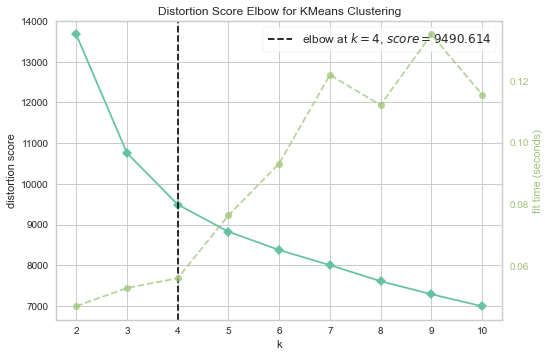

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [51]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(scaled_ds)
Elbow_M.show()

In [32]:
model = KMeans(n_clusters=4, random_state=42).fit(scaled_ds)
pred = model.predict(scaled_ds)

In [52]:
data['cluster'] = pred+1

In [53]:
data

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Complain,Z_CostContact,Z_Revenue,Response,spent,age,saving,familySize,Living_With,cluster
0,5524,1957,2,4,58138.0,0,0,80,58,635,...,0,3,11,1,1529,64,56609.0,0,0,2
1,2174,1954,2,4,46344.0,1,1,157,38,11,...,0,3,11,0,21,67,46323.0,2,0,1
2,4141,1965,2,5,71613.0,0,0,444,26,426,...,0,3,11,0,734,56,70879.0,0,1,2
3,6182,1984,2,5,26646.0,1,0,199,26,11,...,0,3,11,0,48,37,26598.0,1,1,4
4,5324,1981,4,3,58293.0,1,0,390,94,173,...,0,3,11,0,407,40,57886.0,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,2,3,61223.0,0,1,272,46,709,...,0,3,11,0,1094,54,60129.0,1,1,2
2236,4001,1946,4,5,64014.0,2,1,207,56,406,...,0,3,11,0,436,75,63578.0,3,1,3
2237,7270,1981,2,2,56981.0,0,0,521,91,908,...,0,3,11,0,1217,40,55764.0,0,0,2
2238,8235,1956,3,5,69245.0,0,1,500,8,428,...,0,3,11,0,782,65,68463.0,1,1,3


In [67]:
import collections
s =copied_data['Living_With'].unique()
d =data['Living_With'].unique()
mar_dic={}
for i in range(len(s)):
    mar_dic[d[i]] = s[i]
mar_dic = collections.OrderedDict(sorted(mar_dic.items()))
print(mar_dic)

OrderedDict([(0, 'Alone'), (1, 'Partner')])


In [55]:
df['cluster'] = pred+1

In [56]:
sns.color_palette("Set2")
sns.set_palette("Set2")

<AxesSubplot:xlabel='cluster', ylabel='count'>

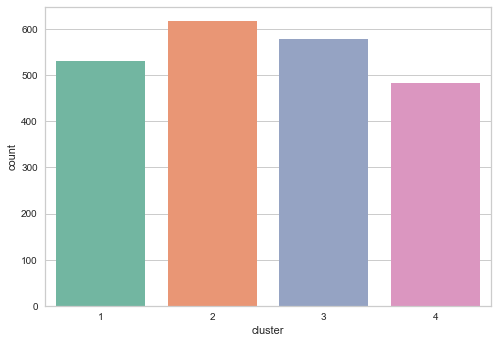

In [57]:
#fairly distributed
sns.countplot(x='cluster', data=data)

<AxesSubplot:xlabel='age', ylabel='count'>

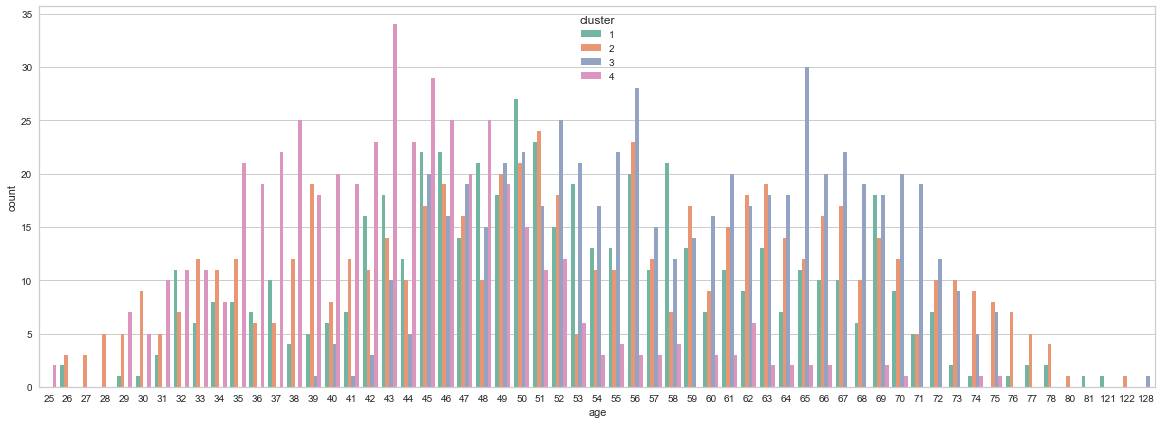

In [58]:
plt.figure(figsize=(20,7))
sns.countplot(x='age', data=data, hue='cluster')

In [59]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'spent', 'age', 'saving', 'familySize', 'Living_With', 'cluster'],
      dtype='object')

<AxesSubplot:xlabel='spent', ylabel='Income'>

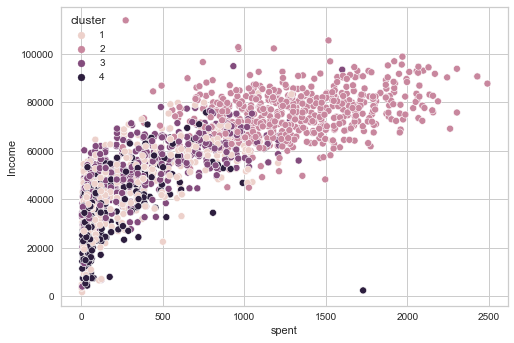

In [60]:
sns.scatterplot(y='Income', x='spent', data=data, hue='cluster')

<AxesSubplot:xlabel='cluster', ylabel='spent'>

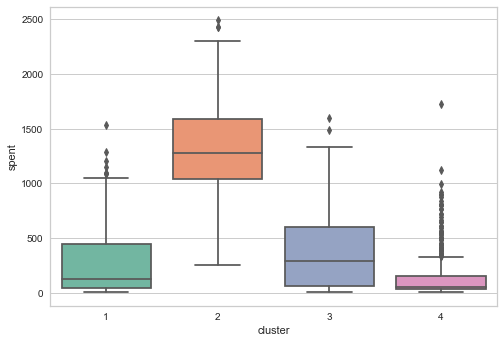

In [61]:
sns.boxplot(x='cluster', y='spent', data=data)

In [62]:
data.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'spent', 'age', 'saving', 'familySize', 'Living_With', 'cluster'],
      dtype='object')

<Figure size 576x396 with 0 Axes>

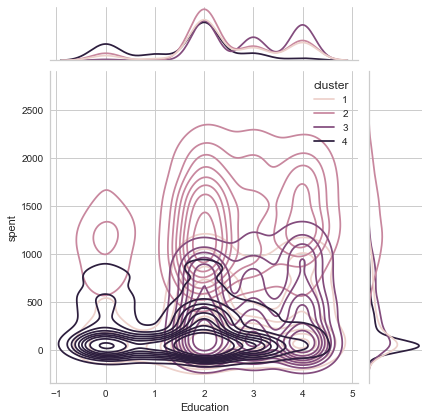

c:\users\thana\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


<Figure size 576x396 with 0 Axes>

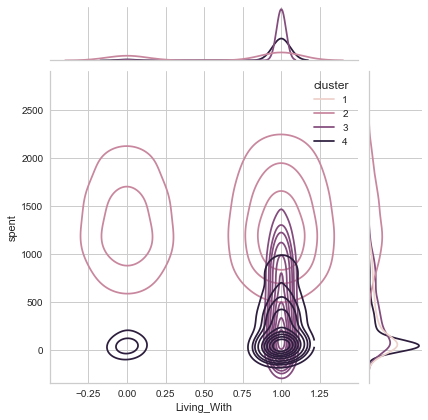

<Figure size 576x396 with 0 Axes>

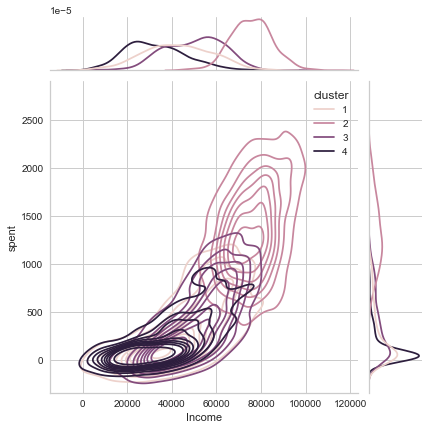

<Figure size 576x396 with 0 Axes>

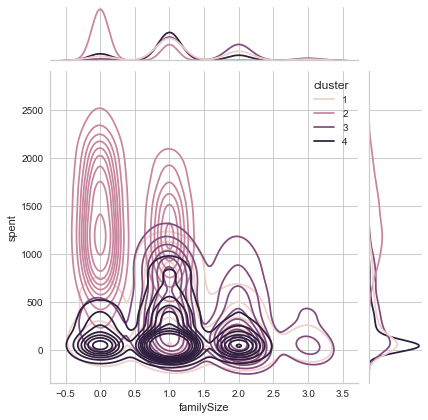

<Figure size 576x396 with 0 Axes>

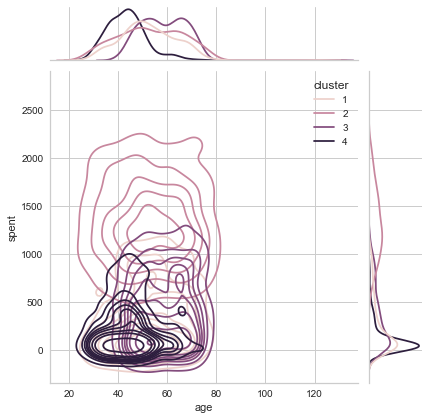

<Figure size 576x396 with 0 Axes>

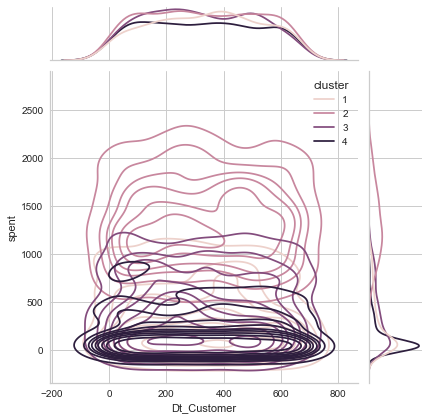

In [65]:
Personal = ["Education", "Living_With", "Income", "familySize", "age", "Dt_Customer"]

for i in Personal:
    plt.figure()
    sns.jointplot(x = i, y = 'spent', data=data, kind="kde", hue='cluster')
    plt.show()
    

<Figure size 576x396 with 0 Axes>

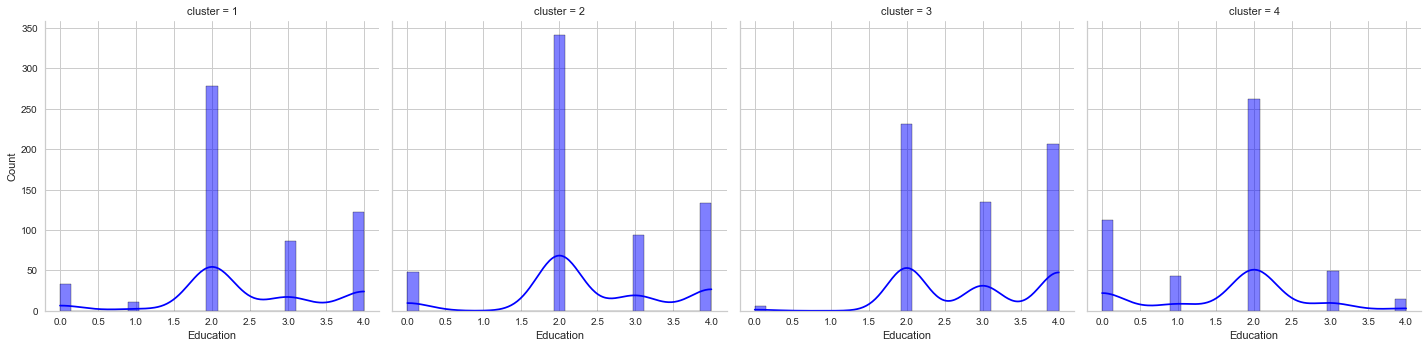

<Figure size 576x396 with 0 Axes>

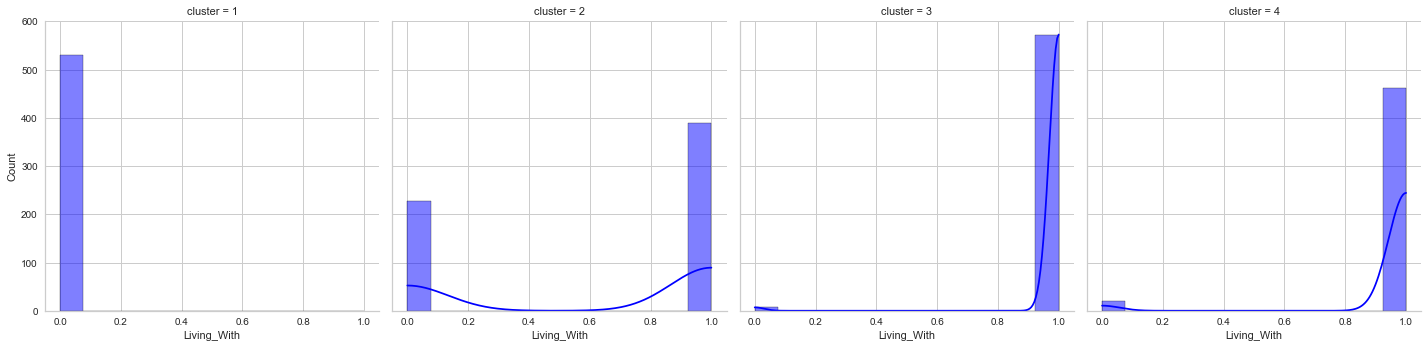

<Figure size 576x396 with 0 Axes>

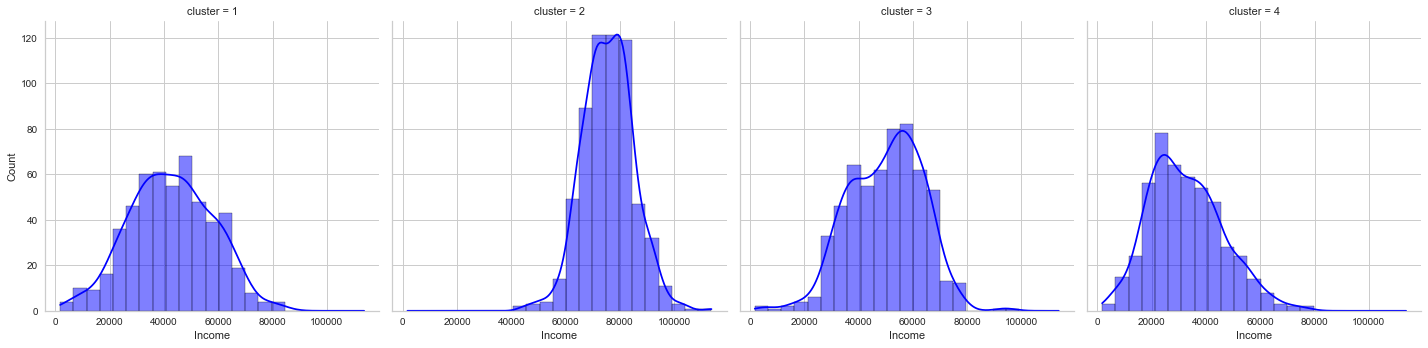

<Figure size 576x396 with 0 Axes>

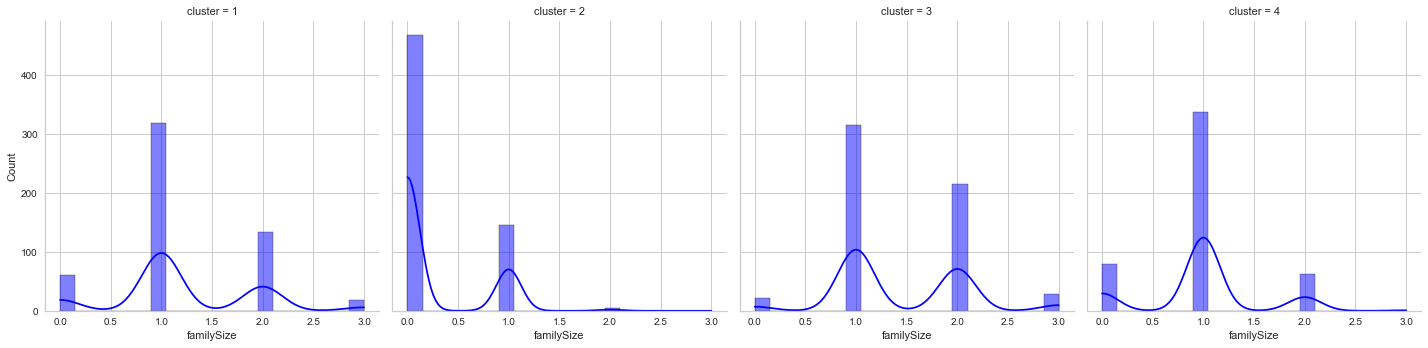

<Figure size 576x396 with 0 Axes>

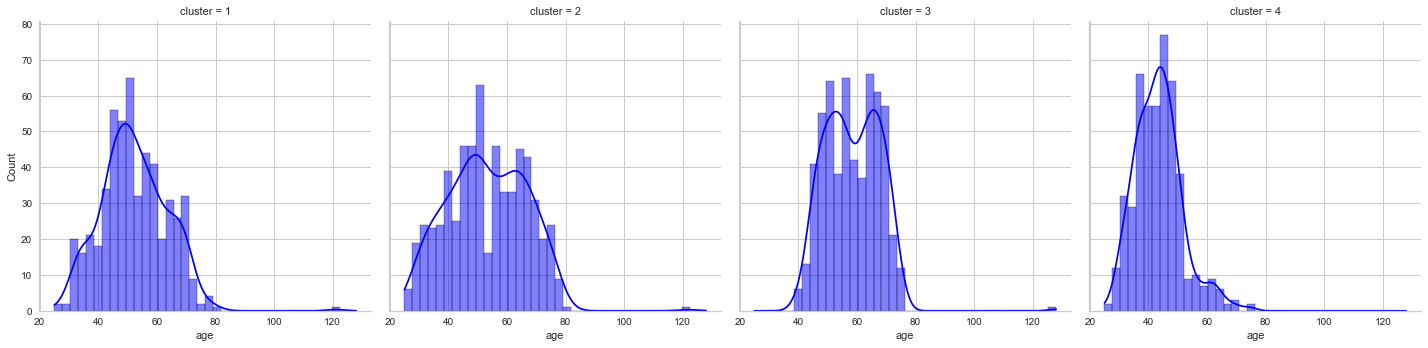

<Figure size 576x396 with 0 Axes>

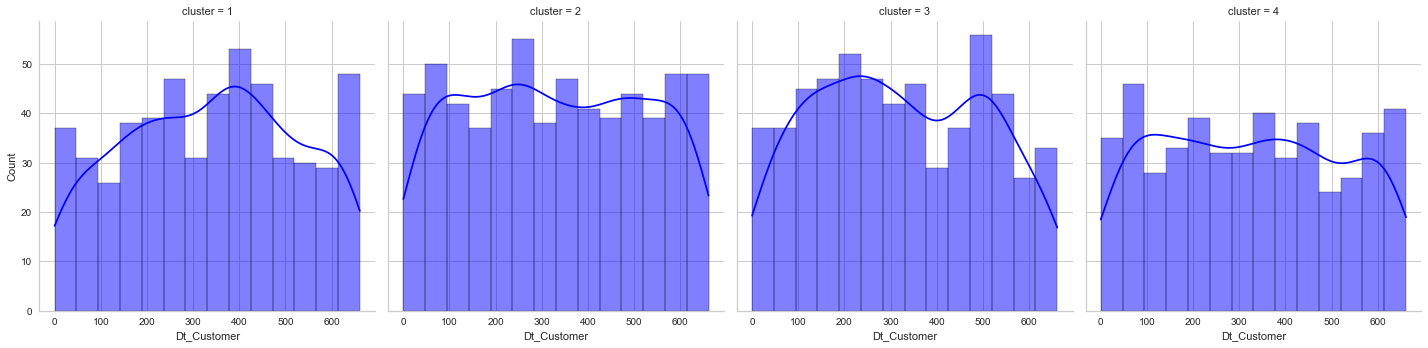

In [66]:
Personal = ["Education", "Living_With", "Income", "familySize", "age", "Dt_Customer"]

for i in Personal:
    plt.figure()
    sns.displot(x = i, data=data, kde=True, col='cluster', color='blue')
    plt.show()

In [68]:
'''
From the graph i can roughly see that 
Cluster1: living_alone(no boyfriend, girlfriend whatsoever), live with 1-2 boys, all age, medium range salary
Cluster2: both cases, no children no kids and teen, all age, RICH BOY
Cluster3: not single, living with 1-3 children big family, majority more than 50 years old (elderly), medium to high salary
Cluster4: they all has someone to live with (TT), mostly living with 1 child, relatively younger than other cluster, 
          low to medium salary
'''

'\nFrom the graph i can roughly see that \nCluster1: living_alone(no boyfriend, girlfriend whatsoever), live with 1-2 boys, all age, medium range salary\nCluster2: both cases, no children no kids and teen, all age, RICH BOY\nCluster3: not single, living with 1-3 children big family, majority more than 50 years old (elderly), medium to high salary\nCluster4: they all has someone to live with (TT), mostly living with 1 child, relatively younger than other cluster, \n          low to medium salary\n\n'